# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [3]:
raw_data = pd.read_csv('Countries-exercise.csv')
raw_data.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

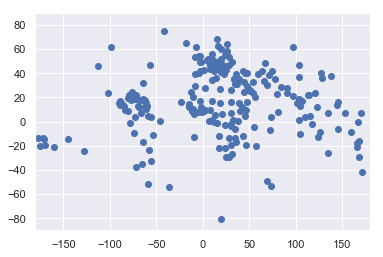

In [4]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [5]:
x = raw_data.iloc[:,1:3]

## Clustering

Use 4 clusters initially.

In [18]:
kmeans = KMeans(7)

### Clustering results

In [19]:
identified_clusters = kmeans.fit_predict(x)

In [20]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,4
2,Angola,17.537368,-12.293361,5
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

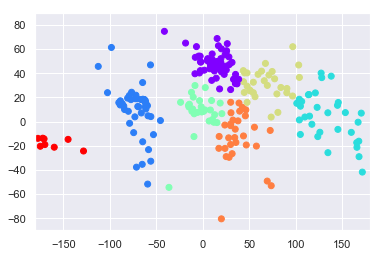

In [21]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [9]:
kmeans.inertia_

256590.585754061

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [10]:
wcss = []
number_of_clusters = range(1,11)
for i in number_of_clusters:
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.522370559,
 256573.08675934302,
 192194.9829002524,
 152721.38595248078,
 126799.10093907751,
 102891.39703473676,
 84967.41720068289,
 76499.77258640353]

### The Elbow Method

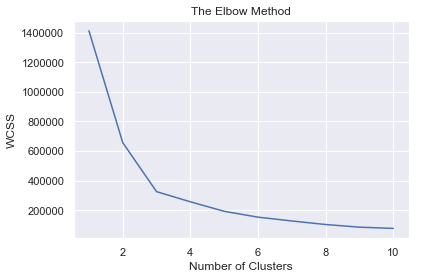

In [12]:
plt.plot(number_of_clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>

In [16]:
kmeans = KMeans(3)

In [17]:
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters

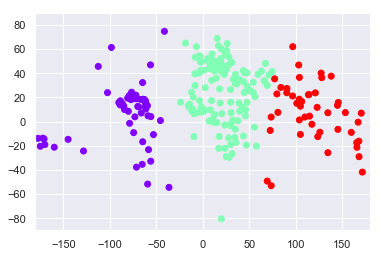

In [18]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()